### Importing all the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Modeling & Preprocessing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_predict

# Set plot style for visualizations
sns.set(style="whitegrid")

In [2]:
MY_CLUSTER_ID = 0  
SUBGROUP_FILE = f'cluster_{MY_CLUSTER_ID}_train_data.csv'

In [3]:
# We set a random seed to ensure that our results are reproducible.
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

### Loading Dataset

In [4]:
df = pd.read_csv("cluster_0_train_data.csv")

In [5]:
df.head()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Cluster_ID
0,0,0,0.450397,0.504034,0.506986,0.594640,0.594640,0.998906,0.797293,0.809239,...,0.004919,0.623634,0.594641,0.838869,0.279036,0.026788,0.565144,1,0.032464,0
1,1,0,0.530005,0.572885,0.574763,0.605695,0.605558,0.999058,0.797512,0.809399,...,0.005968,0.624171,0.605690,0.841869,0.279040,0.026801,0.565205,1,0.032442,0
2,3,0,0.483401,0.556694,0.536164,0.602445,0.602445,0.999035,0.797458,0.809380,...,0.002177,0.621610,0.602444,0.841891,0.293391,0.027063,0.566190,1,0.015406,0
3,4,0,0.510359,0.537287,0.552546,0.600023,0.600023,0.999009,0.797406,0.809313,...,0.001124,0.623993,0.600019,0.840313,0.279878,0.026880,0.565549,1,0.028858,0
4,6,0,0.465071,0.533689,0.516944,0.594740,0.594740,0.998962,0.797393,0.809313,...,0.054013,0.613323,0.594736,0.840085,0.285529,0.029521,0.568791,1,0.019155,0


In [6]:
df.tail()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Cluster_ID
2841,5800,1,0.480135,0.548844,0.532577,0.602445,0.602445,0.999005,0.797423,0.809343,...,0.025895,0.624121,0.602443,0.840868,0.285796,0.027485,0.567156,1,0.018941,0
2842,5801,0,0.475455,0.539250,0.526795,0.598402,0.598402,0.998994,0.797424,0.809338,...,0.002420,0.625053,0.598399,0.840387,0.279400,0.026989,0.565954,1,0.030746,0
2843,5802,0,0.507483,0.547263,0.553188,0.596448,0.596448,0.998991,0.797393,0.809318,...,0.003993,0.625135,0.596443,0.840625,0.286153,0.028366,0.568173,1,0.018670,0
2844,5804,0,0.491639,0.559693,0.541250,0.597003,0.597003,0.998981,0.797405,0.809327,...,0.004849,0.623857,0.597002,0.841610,0.280399,0.026902,0.565636,1,0.027161,0
2845,5805,0,0.513626,0.573321,0.555758,0.646665,0.646665,0.999066,0.797506,0.809396,...,0.000476,0.623845,0.646663,0.842716,0.287670,0.026791,0.565159,1,0.017685,0


In [7]:
df.shape

(2846, 98)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2846 entries, 0 to 2845
Data columns (total 98 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Index                                                     2846 non-null   int64  
 1   Bankrupt?                                                 2846 non-null   int64  
 2    ROA(C) before interest and depreciation before interest  2846 non-null   float64
 3    ROA(A) before interest and % after tax                   2846 non-null   float64
 4    ROA(B) before interest and depreciation after tax        2846 non-null   float64
 5    Operating Gross Margin                                   2846 non-null   float64
 6    Realized Sales Gross Margin                              2846 non-null   float64
 7    Operating Profit Rate                                    2846 non-null   float64
 8    Pre-tax net Inter

In [9]:
df.describe()

,Index,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Cluster_ID
count,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,...,2.846000e+03,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.000000,2846.0,2846.000000,2846.0
mean,2884.539705,0.022136,0.502041,0.557952,0.551707,0.605334,0.605316,0.999021,0.797469,0.809381,...,5.643008e+06,0.623803,0.605332,0.841181,0.281388,0.028097,0.565878,1.0,0.029044,0.0
std,1675.141181,0.147153,0.029177,0.026295,0.027979,0.008600,0.008581,0.000110,0.000314,0.000295,...,2.171229e+08,0.007265,0.008600,0.001286,0.004006,0.015847,0.009707,0.0,0.009636,0.0
min,0.000000,0.000000,0.387072,0.478685,0.400878,0.555781,0.555781,0.996817,0.795183,0.807234,...,1.135300e-04,0.531839,0.555781,0.837160,0.275833,0.000000,0.319590,1.0,0.012472,0.0
25%,1418.250000,0.000000,0.481597,0.540844,0.532537,0.599699,0.599722,0.998978,0.797398,0.809322,...,1.225018e-03,0.623514,0.599695,0.840322,0.278786,0.026813,0.565293,1.0,0.022313,0.0
50%,2862.000000,0.000000,0.498684,0.556422,0.548878,0.603706,0.603699,0.999013,0.797445,0.809359,...,2.881939e-03,0.623763,0.603704,0.841086,0.280373,0.026895,0.565648,1.0,0.027241,0.0
75%,4312.500000,0.000000,0.519670,0.574575,0.568044,0.609057,0.609087,0.999057,0.797511,0.809415,...,6.850675e-03,0.623990,0.609058,0.842003,0.282694,0.027125,0.566509,1.0,0.033817,0.0
max,5805.000000,1.000000,0.621898,0.660925,0.657476,0.664502,0.664502,0.999706,0.809513,0.821053,...,9.650000e+09,0.956387,0.664500,0.847191,0.317897,0.540672,0.736985,1.0,0.094288,0.0


In [10]:
df.isnull().sum()

Index                                                       0
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
                                                           ..
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Cluster_ID                                                  0
Length: 98, dtype: int64

In [11]:
# Separate the Target (Bankrupt?) from the Features
y = df['Bankrupt?']
# We drop administrative columns that shouldn't be used for prediction.
drop_cols = ['Index', 'Bankrupt?', 'Cluster_ID']
X = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [12]:
print(f"Initial Feature Count: {X.shape[1]}")

Initial Feature Count: 95


### Exploratory Data Analysis (EDA)

/var/folders/jn/7q4k5xqj6tdc7t0t0_c17hrm0000gn/T/ipykernel_58573/521972749.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=y, palette='viridis')


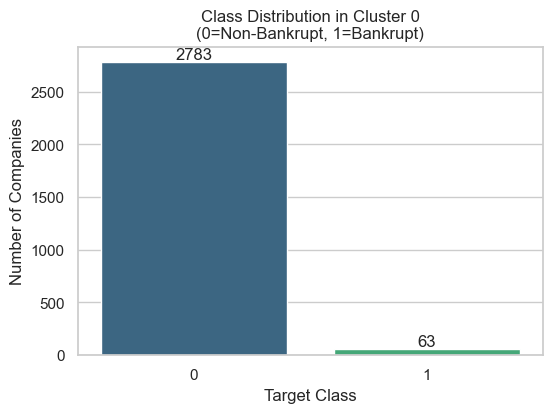

In [13]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=y, palette='viridis')
plt.title(f'Class Distribution in Cluster {MY_CLUSTER_ID}\n(0=Non-Bankrupt, 1=Bankrupt)')
plt.xlabel('Target Class')
plt.ylabel('Number of Companies')
# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [14]:
print(f"Bankruptcy Rate in this Cluster: {y.mean():.2%}")

Bankruptcy Rate in this Cluster: 2.21%


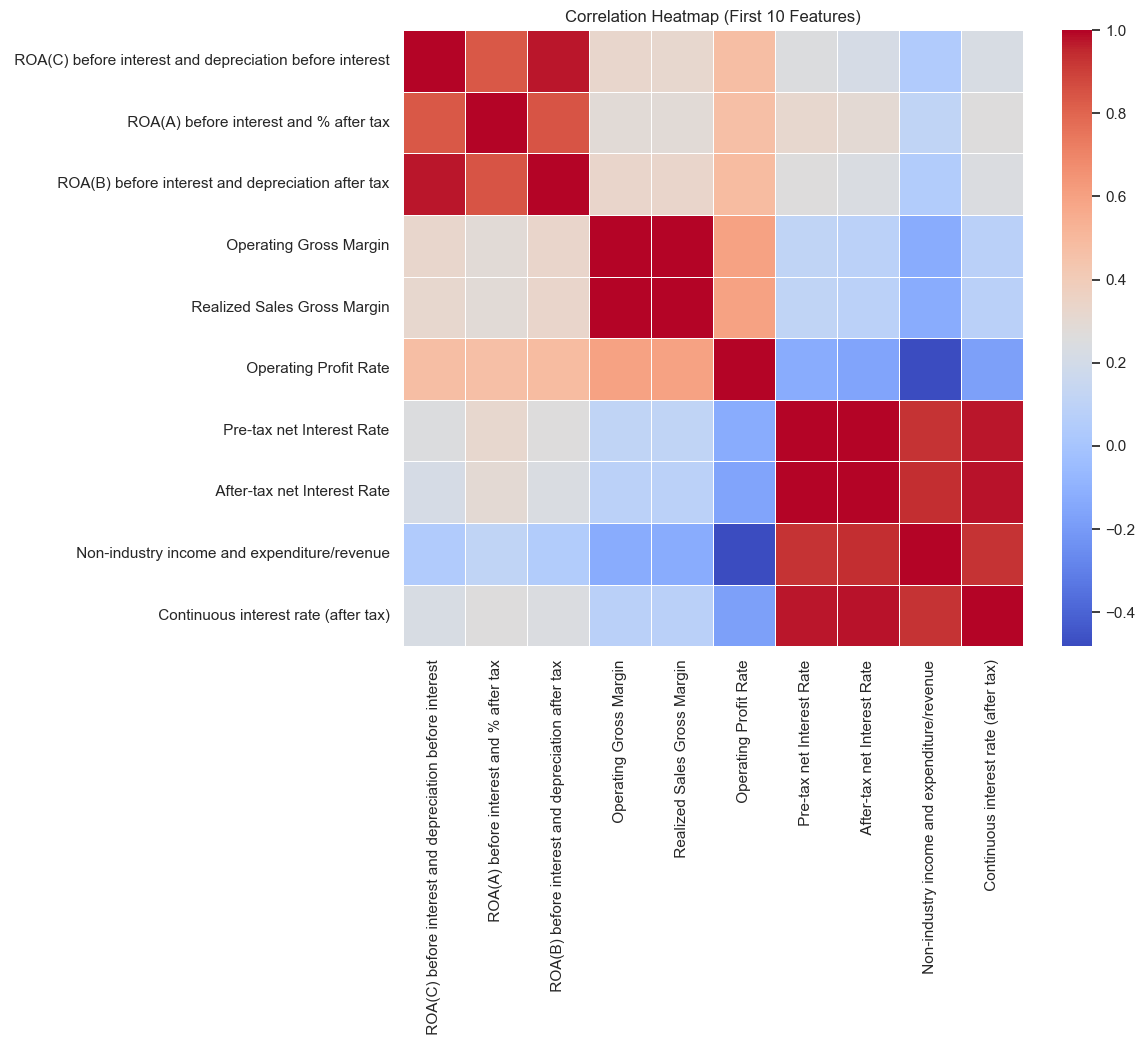

In [15]:
if len(df) > 10: # Only plot if we have enough data
    plt.figure(figsize=(10, 8))
    # Select a subset of features for readability
    subset_corr = X.iloc[:, :10].corr()
    sns.heatmap(subset_corr, annot=False, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap (First 10 Features)')
    plt.show()

### Data Preprocessing & Feature Selection

In [16]:
# Even though the data is clean, we use an Imputer as a safety net for any missing values.
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [17]:
# We standardize features to have mean=0 and variance=1.
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_imputed)

In [18]:
selector = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    max_features=45, 
    threshold=-np.inf # Required when using max_features
)

In [19]:
X_scaled = selector.fit_transform(X_scaled_full, y)

In [20]:
# Save the names of the selected features
selected_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_indices].tolist()
n_features = X_scaled.shape[1]

In [21]:
print(f"Final Feature Count: {n_features}")

Final Feature Count: 45


### Model Training

In [22]:
# We define a custom "Constant Classifier" to handle edge cases where a cluster might have only one class (e.g., all Bankrupt). This requirement satisfies handling every subgroup, even the weird ones.
class ConstantClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, prediction):
        self.prediction = prediction
    def fit(self, X, y):
        return self
    def predict(self, X):
        return np.full(X.shape[0], self.prediction)
    def predict_proba(self, X):
        # Return 100% probability for the constant class
        if self.prediction == 1:
            return np.column_stack((np.zeros(X.shape[0]), np.ones(X.shape[0])))
        else:
            return np.column_stack((np.ones(X.shape[0]), np.zeros(X.shape[0])))

In [23]:
# Check unique classes in this cluster
unique_classes = np.unique(y)
n_samples = len(y)


Training Stacking Ensemble on 2846 samples...
Base Models: Random Forest, Gradient Boosting, Logistic Regression
Model Training Complete.

 Tuning Probability Threshold
Optimization Complete. Selected Threshold: 0.10


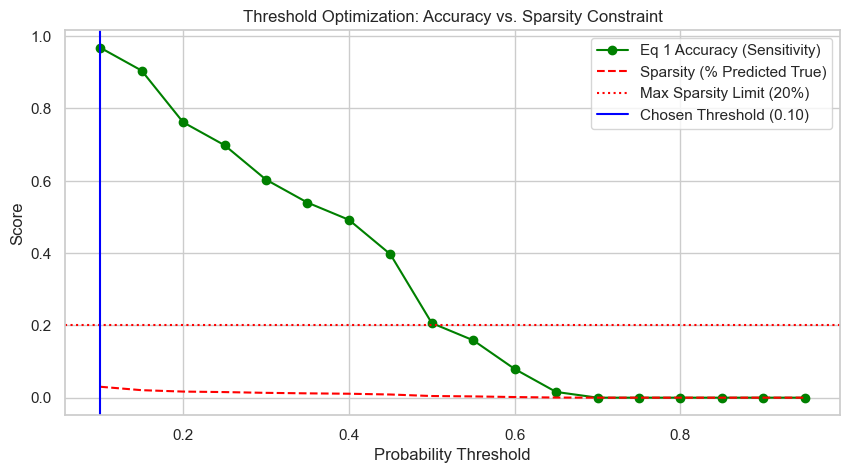

In [24]:
if len(unique_classes) < 2:
    print(f"\n[!] SPECIAL CASE: Cluster {MY_CLUSTER_ID} contains only class {unique_classes[0]}.")
    print(" Stacking is not possible. Using a Constant Classifier.")
    clf = ConstantClassifier(prediction=unique_classes[0])
    clf.fit(X_scaled, y)
    y_proba = clf.predict_proba(X_scaled)[:, 1]
    best_threshold = 0.5 

else:
    print(f"\nTraining Stacking Ensemble on {n_samples} samples...")
    print("Base Models: Random Forest, Gradient Boosting, Logistic Regression")
    
    # Adjust Cross-Validation folds based on sample size to prevent errors
    cv_folds = 5
    if n_samples < 20: cv_folds = 2
    
    # Define the Stacking Architecture
    # Base Estimators: Diverse models to capture different patterns
    estimators = [
        ('rf', RandomForestClassifier(n_estimators=50, random_state=RANDOM_SEED, class_weight='balanced')),
        ('gb', GradientBoostingClassifier(n_estimators=50, random_state=RANDOM_SEED)),
        ('lr', LogisticRegression(random_state=RANDOM_SEED, class_weight='balanced', max_iter=2000))
    ]
    
    # Meta Learner: Logistic Regression to combine the base predictions
    clf = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=cv_folds,
        n_jobs=-1
    )
    
    clf.fit(X_scaled, y)
    print("Model Training Complete.")
    
    # Get probability predictions (needed for threshold tuning)
    y_proba = clf.predict_proba(X_scaled)[:, 1]
    
    # THRESHOLD TUNING 
    # We iterate through thresholds to find the "sweet spot" that maximizes
    # Equation 1 accuracy (TT / (TT+TF)) 
    print("\n Tuning Probability Threshold")
    
    best_threshold = 0.5
    best_acc_eq1 = -1
    
    thresholds = np.arange(0.1, 0.99, 0.05)
    accuracies = []
    sparsities = []
    
    for thresh in thresholds:
        y_pred_temp = (y_proba >= thresh).astype(int)
        tn, fp, fn, tp = confusion_matrix(y, y_pred_temp, labels=[0,1]).ravel()
        
        # What % do we predict as Bankrupt? (Must be < 0.20)
        sparsity = (tp + fp) / len(y)
        sparsities.append(sparsity)
        
        # Equation 1 Accuracy: Sensitivity (Recall of the positive class)
        denom = (fn + tp)
        acc_eq1 = tp / denom if denom > 0 else 0
        accuracies.append(acc_eq1)
        
        # Selection Logic
        if sparsity < 0.20:
            if acc_eq1 > best_acc_eq1:
                best_acc_eq1 = acc_eq1
                best_threshold = thresh
                
    print(f"Optimization Complete. Selected Threshold: {best_threshold:.2f}")

    plt.figure(figsize=(10, 5))
    plt.plot(thresholds, accuracies, label='Eq 1 Accuracy (Sensitivity)', marker='o', color='green')
    plt.plot(thresholds, sparsities, label='Sparsity (% Predicted True)', linestyle='--', color='red')
    plt.axhline(y=0.20, color='red', linestyle=':', label='Max Sparsity Limit (20%)')
    plt.axvline(x=best_threshold, color='blue', linestyle='-', label=f'Chosen Threshold ({best_threshold:.2f})')
    plt.title('Threshold Optimization: Accuracy vs. Sparsity Constraint')
    plt.xlabel('Probability Threshold')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

### Reporting & Evaluation

In [25]:
# Final predictions using the optimized threshold
y_final_pred = (y_proba >= best_threshold).astype(int)
cm = confusion_matrix(y, y_final_pred, labels=[0,1])
tn, fp, fn, tp = cm.ravel()

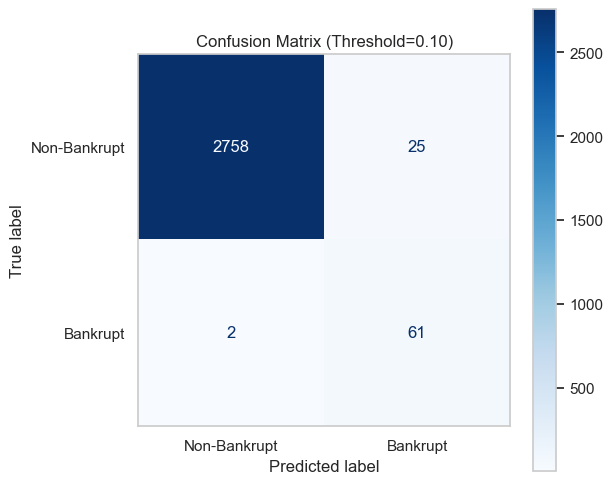

In [26]:
# Showing exactly how many bankruptcies we caught (TT) vs missed (TF).
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Bankrupt', 'Bankrupt'])
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d', ax=plt.gca())
plt.title(f'Confusion Matrix (Threshold={best_threshold:.2f})')
plt.grid(False)
plt.show()

In [27]:
print("\n" + "="*50)
print(f" TABLE 3 REPORT (Cluster {MY_CLUSTER_ID})")
print("="*50)
print(f"Subgroup ID:           {MY_CLUSTER_ID}")
print(f"Total Companies:       {len(y)}")
print(f"Actual Bankruptcies:   {sum(y)}")
print("-" * 30)
print(f"Stacking TT (Correct): {tp}")
print(f"Stacking TF (Missed):  {fn}")
print("-" * 30)
print(f"N_features:            {n_features}")
print("="*50)


 TABLE 3 REPORT (Cluster 0)
Subgroup ID:           0
Total Companies:       2846
Actual Bankruptcies:   63
------------------------------
Stacking TT (Correct): 61
Stacking TF (Missed):  2
------------------------------
N_features:            45


### Saving Model

In [28]:
# We save everything needed to apply this model to new Test Data.
model_bundle = {
    'model': clf,
    'scaler': scaler,
    'imputer': imputer,
    'threshold': best_threshold,
    'features': selected_feature_names # Important: Saves the 40 selected features
}
filename = f'member_model_cluster_0.joblib'
joblib.dump(model_bundle, filename)
print(f"\nSUCCESS: Saved model bundle to '{filename}'.")


SUCCESS: Saved model bundle to 'member_model_cluster_0.joblib'.


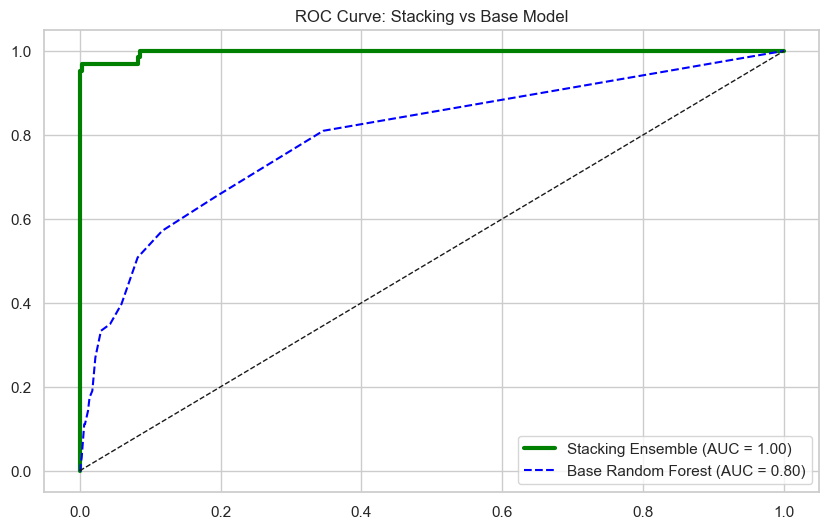

/var/folders/jn/7q4k5xqj6tdc7t0t0_c17hrm0000gn/T/ipykernel_58573/1458051099.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=X[feat], palette="muted", split=False)
/var/folders/jn/7q4k5xqj6tdc7t0t0_c17hrm0000gn/T/ipykernel_58573/1458051099.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=X[feat], palette="muted", split=False)
/var/folders/jn/7q4k5xqj6tdc7t0t0_c17hrm0000gn/T/ipykernel_58573/1458051099.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y, y=X[feat], palette="muted", split=False)


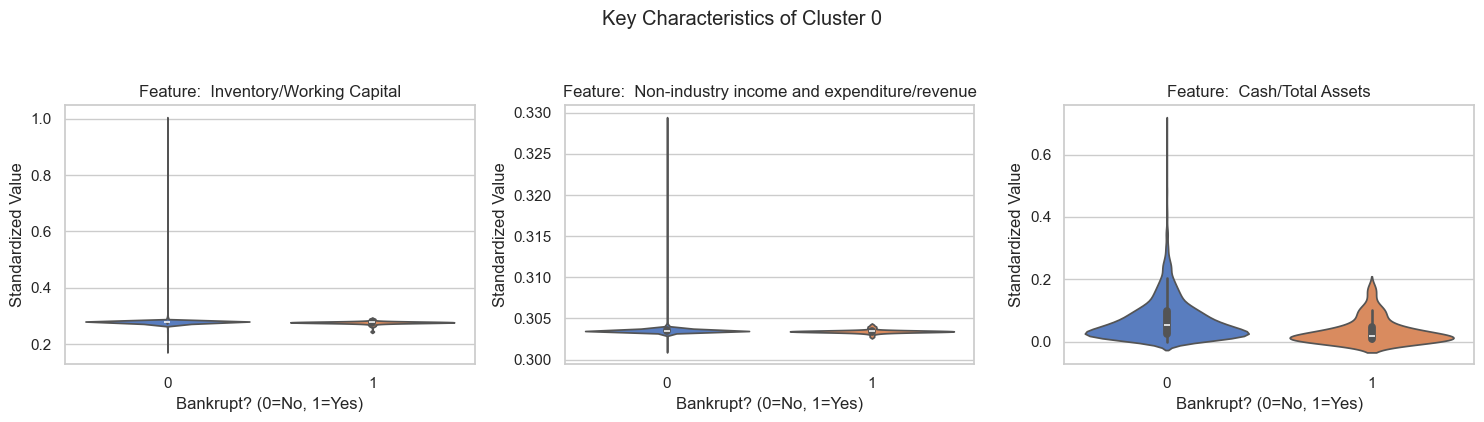

In [29]:
if len(unique_classes) > 1:
    plt.figure(figsize=(10, 6))
    
    # Stacking ROC
    fpr, tpr, _ = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Stacking Ensemble (AUC = {roc_auc:.2f})', color='green', linewidth=3)
    
    # Compare with Base Random Forest
    try:
        rf_base = RandomForestClassifier(n_estimators=50, random_state=RANDOM_SEED, class_weight='balanced')
        # We perform CV to get fair predictions on the training set
        y_probas_rf = cross_val_predict(rf_base, X_scaled, y, cv=5, method='predict_proba', n_jobs=-1)[:, 1]
        fpr_b, tpr_b, _ = roc_curve(y, y_probas_rf)
        auc_b = auc(fpr_b, tpr_b)
        plt.plot(fpr_b, tpr_b, label=f'Base Random Forest (AUC = {auc_b:.2f})', color='blue', linestyle='--')
    except:
        pass 

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.title('ROC Curve: Stacking vs Base Model')
    plt.legend(loc="lower right")
    plt.show()

    rf_selector = RandomForestClassifier(n_estimators=50, random_state=RANDOM_SEED)
    rf_selector.fit(X_scaled, y)
    
    # Map importance back to names
    feat_imp = pd.Series(rf_selector.feature_importances_, index=selected_feature_names).sort_values(ascending=False)
    top_3 = feat_imp.head(3).index.tolist()

    plt.figure(figsize=(15, 4))
    for i, feat in enumerate(top_3):
        plt.subplot(1, 3, i+1)
        sns.violinplot(x=y, y=X[feat], palette="muted", split=False)
        plt.title(f'Feature: {feat}')
        plt.xlabel('Bankrupt? (0=No, 1=Yes)')
        plt.ylabel('Standardized Value')
    plt.suptitle(f'Key Characteristics of Cluster {MY_CLUSTER_ID}', y=1.05)
    plt.tight_layout()
    plt.show()